# Bayesian Regression
* `simi13` -- Bayesian Ridge Regression
* `simi14` -- Automatic Relevance Determination


In [1]:
# add path
import sys; import os; sys.path.append(os.path.realpath("../"))

# general hyperparameter optimization settings
from seasalt import (select_the_best, refit_model) 
from seasalt.si import (cv_settings, scorerfun, print_scores)
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# demo datasets
from datasets.demo2 import X_train, Y_train, fold_ids, X_valid, Y_valid, meta as meta_data
#meta_data

In [3]:
# model implementations
#from potpourri.simi13 import model, hyper, meta  # Bayesian Ridge Regression
from potpourri.simi14 import model, hyper, meta  # Automatic Relevance Determination
meta

{'id': 'simi14',
 'name': 'LinReg ARD',
 'descriptions': 'Automatic Relevance Determination',
 'solver': 'Evidence Maximization',
 'active': True,
 'keywords': ['linear regression',
  'univariate regression',
  'multiple regression',
  'bayesian regression',
  'maximum likelihood estimation',
  'automatic relevance determination',
  'sparse bayesian learning and relevance vector machine',
  'sklearn.linear_model.ARDRegression'],
 'output_num': 'single',
 'output_scale': 'interval',
 'output_dtype': 'float',
 'input_num': 'multi',
 'input_scale': 'interval',
 'input_dtype': 'float'}

## Train

In [4]:
%%time
rscv = RandomizedSearchCV(**{'estimator': model, 'param_distributions': hyper}, **cv_settings)
rscv.fit(X = X_train, y = Y_train)  # Run CV

bestparam, summary = select_the_best(rscv)  # find the "best" parameters
bestmodel = refit_model(model, bestparam, X_train, Y_train)  # Refit the "best" model

/Users/uh/cfs/venv-3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 3.45 s, sys: 604 ms, total: 4.05 s
Wall time: 2min


In [5]:
#rscv.cv_results_

## Evaluate

In [7]:
print("Infer/predict on validation set")
Y_pred = bestmodel.predict(X_valid)

print("\nOut of sample score")
print(scorerfun(Y_valid, Y_pred))

print("\nOut of sample score (Other metrics)")
print_scores(Y_pred, Y_valid)

print("\nBest model parameters")
print(bestparam)

print("\nIn-sample scores and model variants (from CV)")
summary

Infer/predict on validation set

Out of sample score
0.4835642748885446

Out of sample score (Other metrics)
  Mean Squared Error:    2787.8790
 Mean Absolute Error:      42.0426
    Median Abs Error:      35.7410
           R Squared:       0.0250
  Explained Variance:       0.0297

Best model parameters
{'lin__alpha_1': 0.019885395716582228, 'lin__alpha_2': 0.00976311191712374, 'lin__lambda_1': 0.00401828801251301, 'lin__lambda_2': 0.0006567806580478288}

In-sample scores and model variants (from CV)


,lin__alpha_1,lin__alpha_2,lin__lambda_1,lin__lambda_2,cvratio,rank_test_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time
20,0.019885,0.009763,0.004018,0.000657,3.855555,3,0.450360,0.116808,0.748870,0.165772
19,0.014752,0.000769,0.004439,0.001232,3.855102,4,0.450346,0.116818,0.722369,0.154778
30,0.016474,0.022643,0.003827,0.001166,3.854887,5,0.450344,0.116824,1.743430,0.316619
38,0.001565,0.006723,0.042440,0.002772,3.844882,2,0.450745,0.117232,7.882834,4.052614
44,0.011742,0.004890,0.027604,0.001480,3.843288,1,0.450834,0.117304,4.631264,0.754394


### Parameters

In [8]:
bestmodel.steps[1][1].coef_

array([ 1.21253438e-02, -1.01558248e+01,  2.76228509e+01,  1.78656771e+01,
       -4.53040279e+00, -1.23273428e-02, -1.41633341e+01,  1.39572539e-02,
        1.97547487e+01,  2.33601035e-02])

### Target vs Predicted

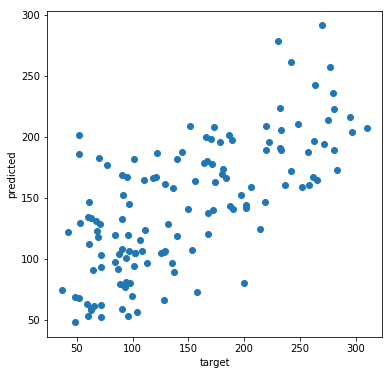

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.scatter(y=Y_pred, x=Y_valid);
#plt.scatter(x=np.log(Y_pred), y=np.log(Y_valid));
plt.xlabel('target');
plt.ylabel('predicted');

## Debug, Memory, Misc

In [10]:
#del summary
#locals()
%whos

Variable             Type                  Data/Info
----------------------------------------------------
RandomizedSearchCV   ABCMeta               <class 'sklearn.model_sel<...>arch.RandomizedSearchCV'>
X_train              ndarray               309x10: 3090 elems, type `float64`, 24720 bytes
X_valid              ndarray               133x10: 1330 elems, type `float64`, 10640 bytes
Y_pred               ndarray               133: 133 elems, type `float64`, 1064 bytes
Y_train              ndarray               309: 309 elems, type `float64`, 2472 bytes
Y_valid              ndarray               133: 133 elems, type `float64`, 1064 bytes
bestmodel            Pipeline              Pipeline(memory=None,\n  <...>n       verbose=False))])
bestparam            dict                  n=4
cv_settings          dict                  n=6
fold_ids             ndarray               309: 309 elems, type `int64`, 2472 bytes
hyper                dict                  n=4
meta                 dict      